In [1]:
import os
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
host = os.environ.get('DB_HOST_DS4A')
db_name = os.environ.get('DB_NAME_DATATHON')
db_user = os.environ.get('DB_USER_DS4A')
db_password = os.environ.get('DB_PASS_DS4A')

In [3]:
connection_string = f'postgresql://{db_user}:{db_password}@{host}/{db_name}'
engine = create_engine(connection_string)

In [4]:
uber = pd.read_sql('uber_trips',
                   engine.connect(),
                   parse_dates='pickup_datetime',
                   columns=['pickup_datetime', 'affiliate_base', 'borough'])


uber['month_year'] = pd.to_datetime(uber['pickup_datetime']).dt.to_period('M')
uber['pickup_hour'] = uber['pickup_datetime'].dt.hour
uber['pickup_weekday'] = uber['pickup_datetime'].dt.weekday

uber.head()

,pickup_datetime,affiliate_base,borough,month_year,pickup_hour,pickup_weekday
0,2015-02-04 17:13:21,B02682,Manhattan,2015-02,17,2
1,2015-02-04 17:23:03,B02306,Manhattan,2015-02,17,2
2,2015-02-04 19:36:23,B02682,Manhattan,2015-02,19,2
3,2015-02-04 09:30:15,B02682,Manhattan,2015-02,9,2
4,2015-02-04 20:11:09,B02682,Manhattan,2015-02,20,2


In [5]:
taxi = pd.read_sql('taxi_trips',
                   engine.connect(),
                   parse_dates='pickup_datetime',
                   columns=['pickup_datetime', 'borough', 'type'])

taxi['month_year'] = pd.to_datetime(taxi['pickup_datetime']).dt.to_period('M')
taxi['pickup_hour'] = taxi['pickup_datetime'].dt.hour
taxi['pickup_weekday'] = taxi['pickup_datetime'].dt.weekday

taxi.head()

,pickup_datetime,borough,type,month_year,pickup_hour,pickup_weekday
0,2015-02-01 01:26:45,Manhattan,G,2015-02,1,6
1,2015-01-02 20:06:28,Brooklyn,G,2015-01,20,4
2,2014-09-27 17:55:38,Brooklyn,G,2014-09,17,5
3,2014-04-27 02:27:04,Brooklyn,G,2014-04,2,6
4,2014-05-26 18:32:19,Brooklyn,G,2014-05,18,0


In [6]:
demographics = pd.read_sql('demographics', 
                           engine.connect())

demographics.drop('id', axis=1, inplace=True)
demographics.head()

,borough,population,total_income,area_squarekm,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,...,less_than_10000,10000_to_14999,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more
0,Bronx,1372111,66794139347,87.5152,102995,98538,99048,114344,110579,103829,...,75525,45782,68197,53967,63301,72104,42686,38418,11715,7980
1,Brooklyn,2503518,168500006492,159.6480,177058,159285,156494,170623,195733,222691,...,105868,64435,105583,90596,116024,146853,98214,107195,45358,45069
2,Manhattan,1584024,198983103829,51.2727,76555,61321,58226,77441,141450,186552,...,71440,39207,62636,51331,64489,94112,73515,99567,56607,132185
3,Queens,2230286,163702982674,231.4290,132453,123751,123397,139078,160848,184896,...,55668,36527,79695,72079,99299,140095,101834,114328,47029,33343
4,Staten Island,468730,42324993228,149.0380,28339,30015,30797,32929,31458,29988,...,11241,6381,13051,11721,15934,25193,22729,31191,15978,11660


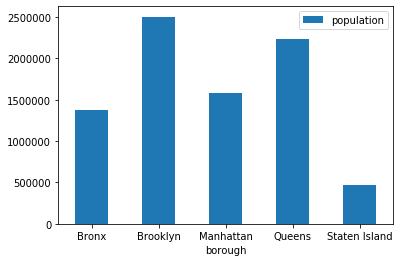

In [7]:
demographics.plot.bar(x='borough', y='population', rot=0, )

In [8]:
uber.head()

,pickup_datetime,affiliate_base,borough,month_year,pickup_hour,pickup_weekday
0,2015-02-04 17:13:21,B02682,Manhattan,2015-02,17,2
1,2015-02-04 17:23:03,B02306,Manhattan,2015-02,17,2
2,2015-02-04 19:36:23,B02682,Manhattan,2015-02,19,2
3,2015-02-04 09:30:15,B02682,Manhattan,2015-02,9,2
4,2015-02-04 20:11:09,B02682,Manhattan,2015-02,20,2


In [15]:
demographics

,borough,population,total_income,area_squarekm,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,...,less_than_10000,10000_to_14999,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more
0,Bronx,1372111,66794139347,87.5152,102995,98538,99048,114344,110579,103829,...,75525,45782,68197,53967,63301,72104,42686,38418,11715,7980
1,Brooklyn,2503518,168500006492,159.6480,177058,159285,156494,170623,195733,222691,...,105868,64435,105583,90596,116024,146853,98214,107195,45358,45069
2,Manhattan,1584024,198983103829,51.2727,76555,61321,58226,77441,141450,186552,...,71440,39207,62636,51331,64489,94112,73515,99567,56607,132185
3,Queens,2230286,163702982674,231.4290,132453,123751,123397,139078,160848,184896,...,55668,36527,79695,72079,99299,140095,101834,114328,47029,33343
4,Staten Island,468730,42324993228,149.0380,28339,30015,30797,32929,31458,29988,...,11241,6381,13051,11721,15934,25193,22729,31191,15978,11660


In [22]:
def f(df, col, hue):
    unique_values = df[hue].unique()
    print(unique_values, len(unique_values)//2)
    fig, axes = plt.subplots(len(unique_values)//2 + 1, 2, figsize=(15,5))
    for i, val in enumerate(unique_values):
        for j in [0, 1]:
            sns.countplot(x=col, 
                          data=df[df[hue] == val], 
                          order=np.sort(df[col].unique()), 
                          ax=axes[i][j])    

['Manhattan' 'Brooklyn' 'Queens' 'Bronx' None 'Staten Island' 'EWR'
 'Does not belong to any borough'] 4


IndexError: index 5 is out of bounds for axis 0 with size 5

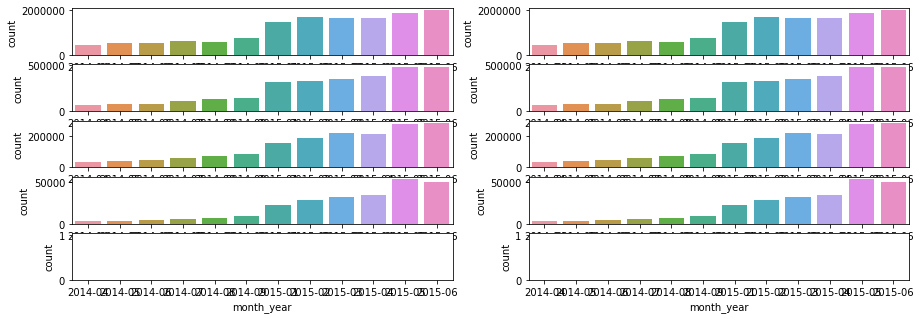

In [23]:
f(uber, 'month_year', 'borough')

In [ ]:
np.sort(uber['month_year'].unique())

In [ ]:
uber.head()

In [ ]:
uber.isna().sum()

In [ ]:
uber['borough'].unique()

In [ ]:
uber.groupby('borough').count()

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15,5))
ax = sns.countplot(x='month_year', data=uber, order=np.sort(uber['month_year'].unique()), ax=ax[0][1])